# Credit Card Fraud Detection

## Context

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Content

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import scipy
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
data=pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.isnull().values.any()

False

In [6]:
# To remove any duplicates
data.drop_duplicates(inplace=True)
data.shape

(283726, 31)

In [7]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]
fraud_percentage = len(fraud)/len(data)*100
print('Percentage of fraud transaction:',fraud_percentage)

Percentage of fraud transaction: 0.1667101358352777


We can see that the percentage of fraud transaction is only 16.67% hence the dataset is highly unbalanced

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [9]:
# the deviation of amount column is huge as compared to other columns hence good to scale this variable
amount = data['Amount'].values
data['Amount'] = StandardScaler().fit_transform(amount.reshape(-1,1))

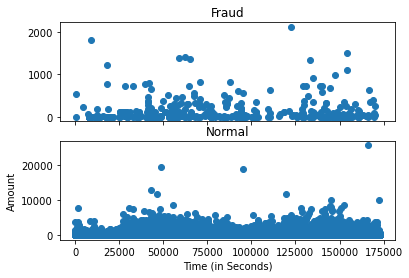

In [11]:
# Checking the dependency on time of transaction
f,(pt1, pt2) = plt.subplots(2, 1, sharex=True)
pt1.scatter(fraud.Time, fraud.Amount)
pt1.set_title('Fraud')
pt2.scatter(normal.Time, normal.Amount)
pt2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [12]:
# As fraud transaction distribution is almost similar over the time range, so good to drop the time column
data.drop(['Time'], axis=1, inplace=True)
data.shape

(283726, 30)

## Train and Test Split

In [14]:
X = data.drop('Class', axis = 1).values
y = data['Class'].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

## Models

We will try with different machine learning models one by one.We can also tune
these models by selecting optimized parameters, but if the accuracy is better 
even with less parameter tuning then no need to make it complex

In [18]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier

### Logistic regression

In [26]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test) # class prediction

In [27]:
print('Accuracy Score of Logistic regression model :',accuracy_score(y_test, lr_yhat))
print('F1 Score of Logistic regression model :',f1_score(y_test, lr_yhat))

Accuracy Score of Logistic regression model : 0.9991682174476963
F1 Score of Logistic regression model : 0.6910994764397905


Accuracy score is almost 99.9% whereas F1 score is only 0.69 and it's 
obvious as the dataset is highly unbalanced thus F1-score is a better metric to 
evaluate our model

### Support Vector Machine

In [23]:
svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

In [28]:
print('F1 Score of Support Vector Machine model :',f1_score(y_test, svm_yhat))

F1 Score of Support Vector Machine model : 0.8128342245989305


### K-Nearest Neighbors

In [29]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

In [30]:
print('F1 Score of K-Nearest Neighbors model :',f1_score(y_test, knn_yhat))

F1 Score of K-Nearest Neighbors model : 0.8181818181818181


### Decistion Tree Classifier

In [31]:
dtc = DecisionTreeClassifier(max_depth = 5, criterion = 'entropy')
dtc.fit(X_train, y_train)
dtc_yhat = dtc.predict(X_test)

In [32]:
print('F1 Score of Decision Tree model :',f1_score(y_test, dtc_yhat))

F1 Score of Decision Tree model : 0.781725888324873


### Random Forest

In [33]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

In [34]:
print('F1 Score of Random forest model :',f1_score(y_test, rf_yhat))

F1 Score of Random forest model : 0.7434554973821991


### XGBoost

In [35]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

D:\Installed\AnacondaN\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:06:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [36]:
print('F1 Score of XGBoost model :',f1_score(y_test, xgb_yhat))

F1 Score of XGBoost model : 0.8585858585858586


In [37]:
## Checking the confusion matrix
confusion_matrix(y_test, xgb_yhat, labels = [0, 1])

array([[70819,     3],
       [   25,    85]], dtype=int64)

In [40]:
# Preparing classification report
from sklearn.metrics import classification_report
print("Classification Report :")
print(classification_report(y_test,xgb_yhat))

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70822
           1       0.97      0.77      0.86       110

    accuracy                           1.00     70932
   macro avg       0.98      0.89      0.93     70932
weighted avg       1.00      1.00      1.00     70932



XGBoost has highest F1-score. We can improve accuracy by using deep learning 
algorithms or increasing more data for fraud cases and making it more balanced 
dataset